In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Problema de Dois corpos

Equações de Newton para o problema de Múltiplos corpos:

$$ 
\begin{align}
m_i \boldsymbol{\ddot{r}_i} = - \sum_{j=1, i \ne j}^{n} \frac{\gamma m_i m_j (\boldsymbol{r}_i - \boldsymbol{r}_j)}{\| \boldsymbol{r}_i - \boldsymbol{r}_j \|^3}, i = 1,2,...,n 
\end{align}
$$

Para o problema de dois corpos fica reduzido a:

$$
\begin{cases}
m_1\boldsymbol{\ddot{r}_1} = - \frac{\gamma m_1 m_2(\boldsymbol{r}_1 - \boldsymbol{r}_2)}{\| \boldsymbol{r_1} - \boldsymbol{r_2} \|^3} \\
m_2\boldsymbol{\ddot{r}_2} = - \frac{\gamma m_1 m_2(\boldsymbol{r}_2 - \boldsymbol{r}_1)}{\| \boldsymbol{r_2} - \boldsymbol{r_1} \|^3} 
\end{cases}
$$

Que, abrindo componente a componente fica:

$$
\begin{cases}
m_1\ddot{r}_{1x} = - \frac{\gamma m_1 m_2(r_{1x} - r_{2x})}{\sqrt{\left((r_{1x}-r_{2x})^2 - (r_{1y} - r_{2y})^2\right)}^3} \\
m_1\ddot{r}_{1y} = - \frac{\gamma m_1 m_2(r_{1y} - r_{2y})}{\sqrt{\left((r_{1x}-r_{2x})^2 - (r_{1y} - r_{2y})^2\right)}^3} \\
m_2\ddot{r}_{2x} = - \frac{\gamma m_1 m_2(r_{2x} - r_{1x})}{\sqrt{\left((r_{1x}-r_{2x})^2 - (r_{1y} - r_{2y})^2\right)}^3} \\
m_2\ddot{r}_{2y} = - \frac{\gamma m_1 m_2(r_{2y} - r_{1y})}{\sqrt{\left((r_{1x}-r_{2x})^2 - (r_{1y} - r_{2y})^2\right)}^3} 
\end{cases}
$$

Que, eliminando os $m_1$, $m_2$ redundantes e assumindo $(\dot{r}_i) = v_i$, temos:

$$
\begin{cases}
\dot{r}_{1x} = v_{1x} \\
\dot{r}_{1y} = v_{1y} \\
\dot{r}_{2x} = v_{2x} \\
\dot{r}_{2y} = v_{2y} \\
\dot{v}_{1x} = - \frac{\gamma m_2 (r_{1x} - r_{2x})}{\sqrt{\left((r_{1x}-r_{2x})^2 - (r_{1y} - r_{2y})^2\right)}^3} \\
\dot{v}_{1y} = - \frac{\gamma m_2 (r_{1y} - r_{2y})}{\sqrt{\left((r_{1x}-r_{2x})^2 - (r_{1y} - r_{2y})^2\right)}^3} \\
\dot{v}_{2x} = - \frac{\gamma m_1 (r_{2x} - r_{1x})}{\sqrt{\left((r_{1x}-r_{2x})^2 - (r_{1y} - r_{2y})^2\right)}^3} \\
\dot{v}_{2y} = - \frac{\gamma m_1 (r_{2y} - r_{1y})}{\sqrt{\left((r_{1x}-r_{2x})^2 - (r_{1y} - r_{2y})^2\right)}^3} 
\end{cases}
$$

E podemos resolver o problema dos dois corpos com métodos numéricos tradicionais.

In [21]:
# Helper plot functions
def pplot(tn, un, label):
    fig, ax = plt.subplots()
    plt.plot(tn, un, label=label)
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.title("Numeric solution of Differential Equation")
    plt.legend()
    ax = plt.gca()

def pplot2(tn1, un1, label1, tn2, un2, label2):
    fig, ax = plt.subplots()
    plt.plot(tn1, un1, label=label1)
    plt.plot(tn2, un2, label=label2)
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.title("Numeric solution of Differential Equation")
    plt.legend()
    ax = plt.gca()



In [11]:
# Runge-Kutta4 implementation:
def evaluate_runge_kutta(f, u0, h = 0.0001, start = 0, finish = 60):
    # With h = 0.0001, the solutions of the two body problems 
    # become stable (which they are), so this is the base value of h:
    t = [start]
    u = [u0]
    i = 1
    while t[-1] < finish:
        tn = t[-1]
        un = u[-1]
        k1 = f(tn, un)
        k2 = f(tn + h/2, un + (h/2)*k1)
        k3 = f(tn + h/2, un + (h/2)*k2)
        k4 = f(tn + h, un + h*k3)
        t.append(t[-1] + h)
        u.append(un + (h/6)*(k1 + 2*k2 + 2*k3 + k4))
        i = i + 1
    return np.vstack((np.transpose(t), np.transpose(u)))

In [12]:
# Verlet implementation:
def evaluate_verlet():
    # To be implemented
    pass

In [13]:
# Two Body system function:
def two_body(t, u): # t (time) parameter is ignored, since the equations are autonomous
    # Constants:
    gamma = 1
    m1 = 1
    m2 = 1
    
    # Input parameters:
    r_1x = u[0]
    r_1y = u[1]
    r_2x = u[2]
    r_2y = u[3]
    v_1x = u[4]
    v_1y = u[5]
    v_2x = u[6]
    v_2y = u[7]
    
    # Evaluation:
    dr_1x = v_1x
    dr_1y = v_1y
    dr_2x = v_2x
    dr_2y = v_2y
    dv_1x = - (gamma * m2 *(r_1x - r_2x))/(((r_1x - r_2x)**2 + (r_1y - r_2y)**2)**(3/2))
    dv_1y = - (gamma * m2 *(r_1y - r_2y))/(((r_1x - r_2x)**2 + (r_1y - r_2y)**2)**(3/2))
    dv_2x = - (gamma * m1 *(r_2x - r_1x))/(((r_2x - r_1x)**2 + (r_2y - r_1y)**2)**(3/2))
    dv_2y = - (gamma * m1 *(r_2y - r_1y))/(((r_2x - r_1x)**2 + (r_2y - r_1y)**2)**(3/2))
    return np.array([dr_1x,dr_1y,dr_2x,dr_2y,dv_1x,dv_1y,dv_2x,dv_2y])

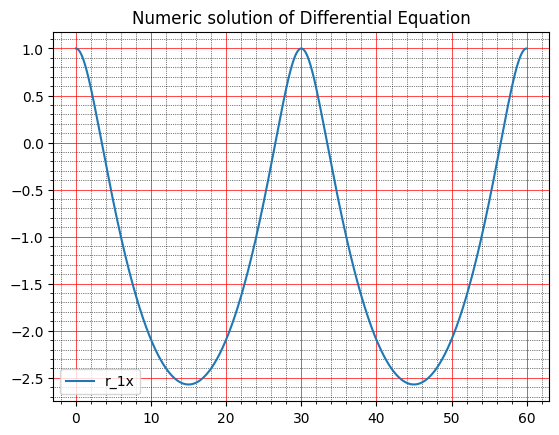

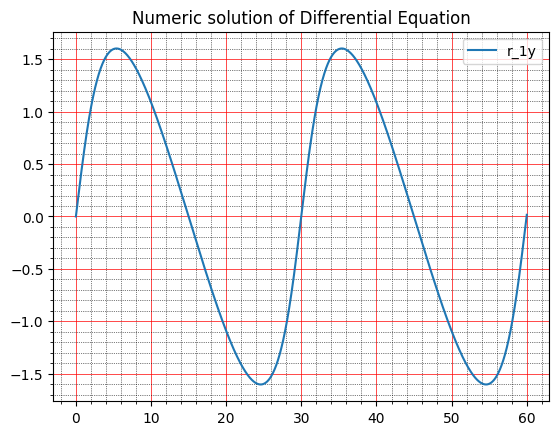

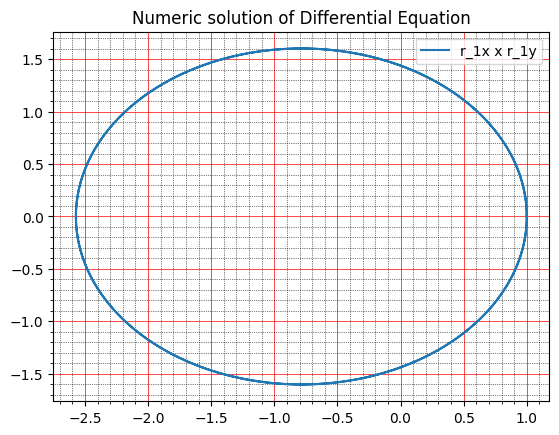

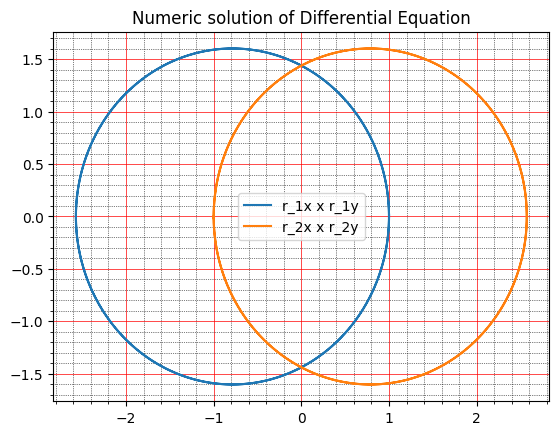

In [22]:
simulation = evaluate_runge_kutta(two_body, [1, 0, -1, 0, 0, 0.6, 0, -0.6], finish=60)
pplot(simulation[0], simulation[1], "r_1x")
pplot(simulation[0], simulation[2], "r_1y")
pplot(simulation[1], simulation[2], "r_1x x r_1y")
pplot2(simulation[1], simulation[2], "r_1x x r_1y", simulation[3], simulation[4], "r_2x x r_2y")